# Exploring the different regridded versions of the GCM data

## Load some import constants

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cftime

In [2]:
# Our two different projections
cp_model_rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
platecarree = ccrs.PlateCarree()

In [3]:
def plot_with_ts(slices, timestamps, variable='pr'):
    f, axes = plt.subplots(len(timestamps), len(slices), figsize=(20, 20), subplot_kw={'projection': cp_model_rotated_pole})
    f.tight_layout(h_pad=2)
    # make sure axes is 2-d even if only 1 timestamp and or slice
    axes = axes.reshape(len(timestamps),len(slices))
    
    for t, timestamp in enumerate(timestamps):
        for i, data in enumerate(slices):
            ax = axes[t][i]
            ax.coastlines()
            
            x = "longitude"
            y = "latitude"
            transform = platecarree
            if "grid_latitude" in data.coords.keys():
                x = f"grid_longitude"
                y = f"grid_latitude"
                transform = cp_model_rotated_pole
            
            data.sel(time=timestamp)[variable].plot(ax=ax, x=x, y=y, add_colorbar=True, transform = transform, vmin=0)

    plt.show()

## Load the different datasets

In [4]:
#orig_gcm_data = xr.open_mfdataset("../../../../data/60km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
london_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
london_cpm_data = xr.open_mfdataset("../../../../derived_data/2.2km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

london_regridded_nn_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-nn-regrid-2.2km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
london_regridded_lin_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-lin-regrid-2.2km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

gcm_data = xr.open_mfdataset("../../../../derived_data/60km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
cpm_data = xr.open_mfdataset("../../../../data/2.2km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

regridded_nn_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-nn-regrid-2.2km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
regridded_lin_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-lin-regrid-2.2km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

# View rainfall on same days in different versions of data in London

The raw GCM precip, the GCM precip regrided to match CPM grid according to NN and linear schemes, and the raw CPM precip in London (with zoomed out versions of whole of UK for GCM and CPM to check)

In [5]:
five_wettest_gcm_days = london_gcm_data.sum(dim=["projection_x_coordinate", "projection_y_coordinate"]).sortby('pr').time[-5:]
five_wettest_regridded_nn_gcm_days = london_regridded_nn_gcm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]
five_wettest_regridded_lin_gcm_days = london_regridded_lin_gcm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]
five_wettest_cpm_days = london_cpm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 171 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 171 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 171 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 171 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order in

In [6]:
five_wettest_gcm_days.values

array([cftime.Datetime360Day(1981, 4, 4, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 19, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 13, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 3, 12, 0, 0, 0)], dtype=object)

In [7]:
five_wettest_cpm_days.values

array([cftime.Datetime360Day(1982, 6, 24, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 3, 23, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 6, 6, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 26, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0)], dtype=object)

In [8]:
five_wettest_regridded_nn_gcm_days.values

array([cftime.Datetime360Day(1981, 4, 4, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 19, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 13, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 3, 12, 0, 0, 0)], dtype=object)

In [9]:
five_wettest_regridded_lin_gcm_days.values

array([cftime.Datetime360Day(1981, 4, 4, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 19, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 13, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 3, 12, 0, 0, 0)], dtype=object)

## Wettest days according to GCM

Compare plots of precip on 5 wettest days in London boxes according to GCM

Notice how in say 4th row GCM and CPM disagree on which is the wettest quadrant.

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


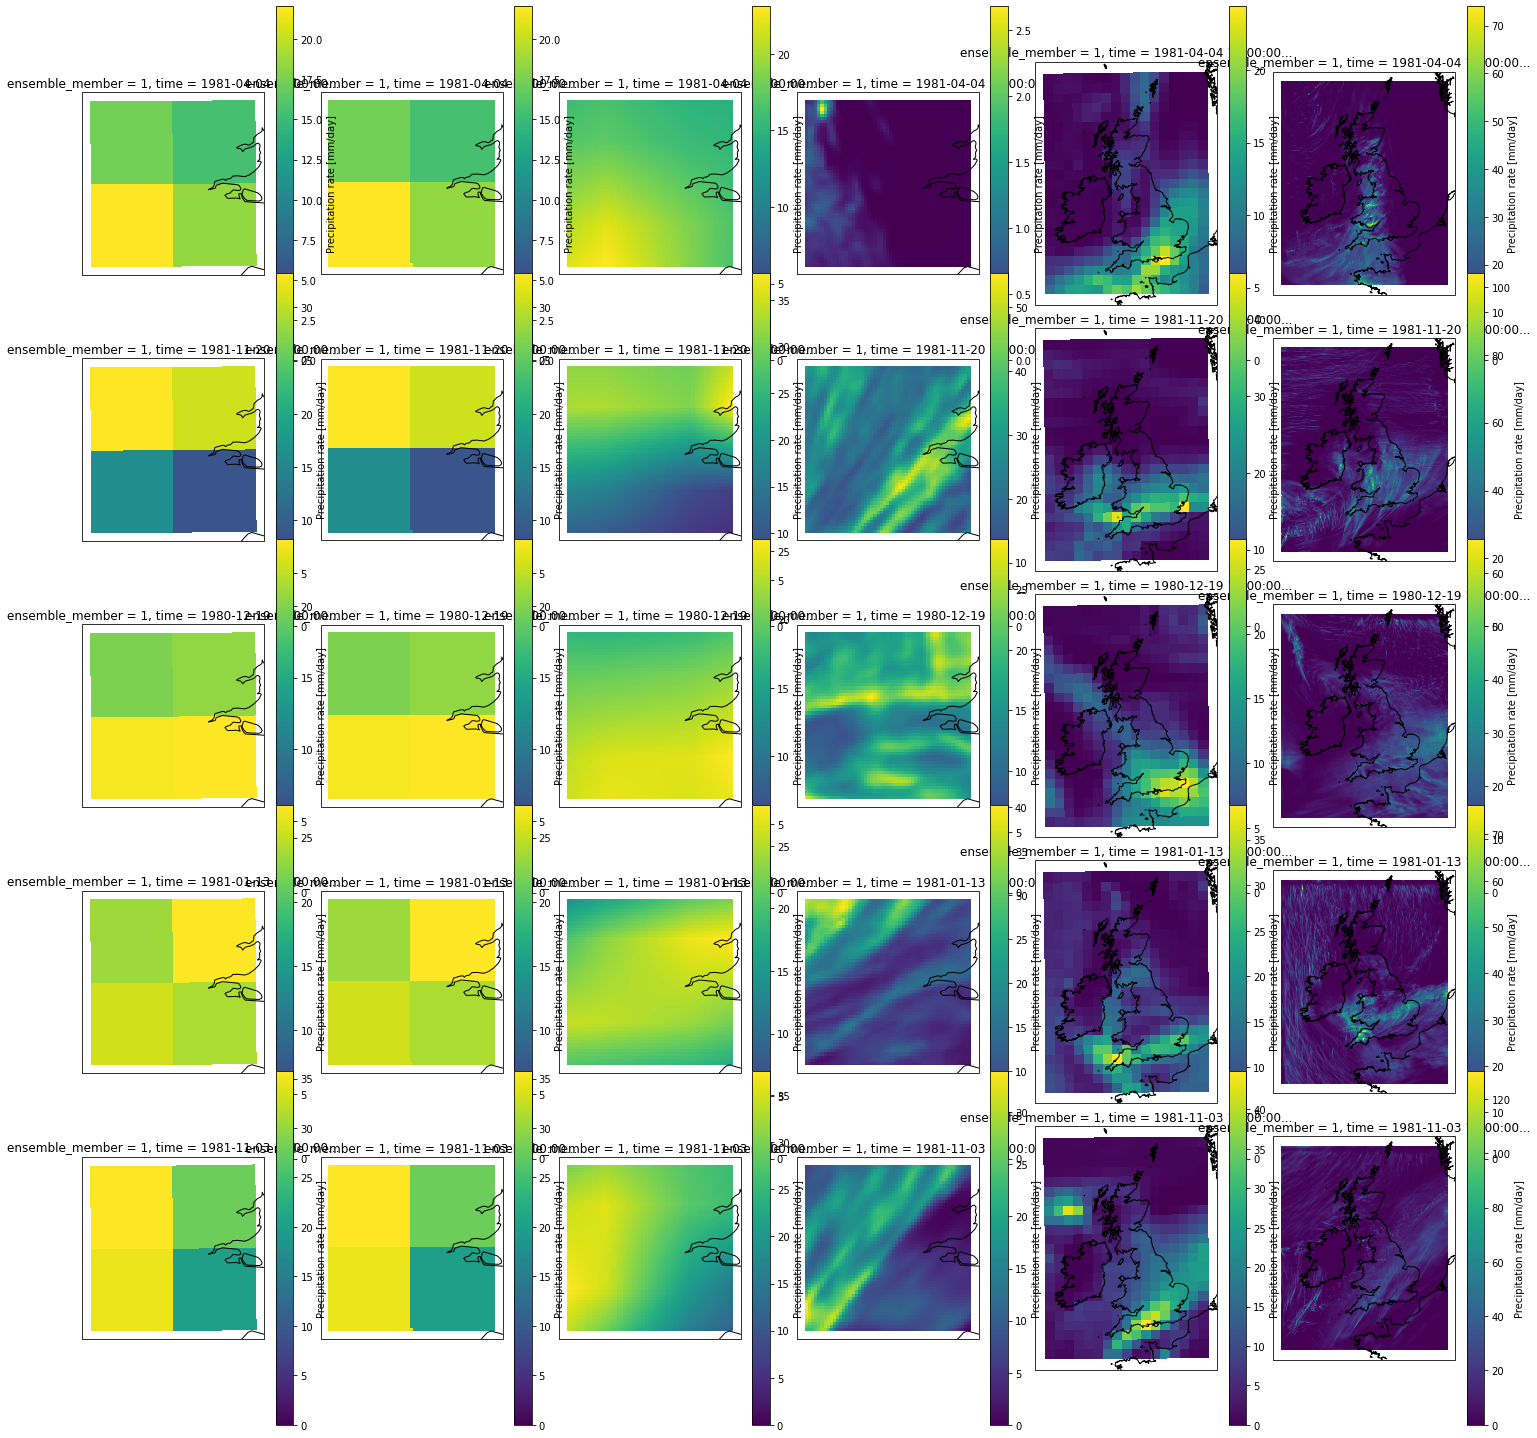

In [10]:
plot_with_ts([london_gcm_data, london_regridded_nn_gcm_data, london_regridded_lin_gcm_data, london_cpm_data, gcm_data, cpm_data], five_wettest_gcm_days)

## Wettest days according to CPM

Compare plots of precip on 5 wettest days in London boxes according to CPM

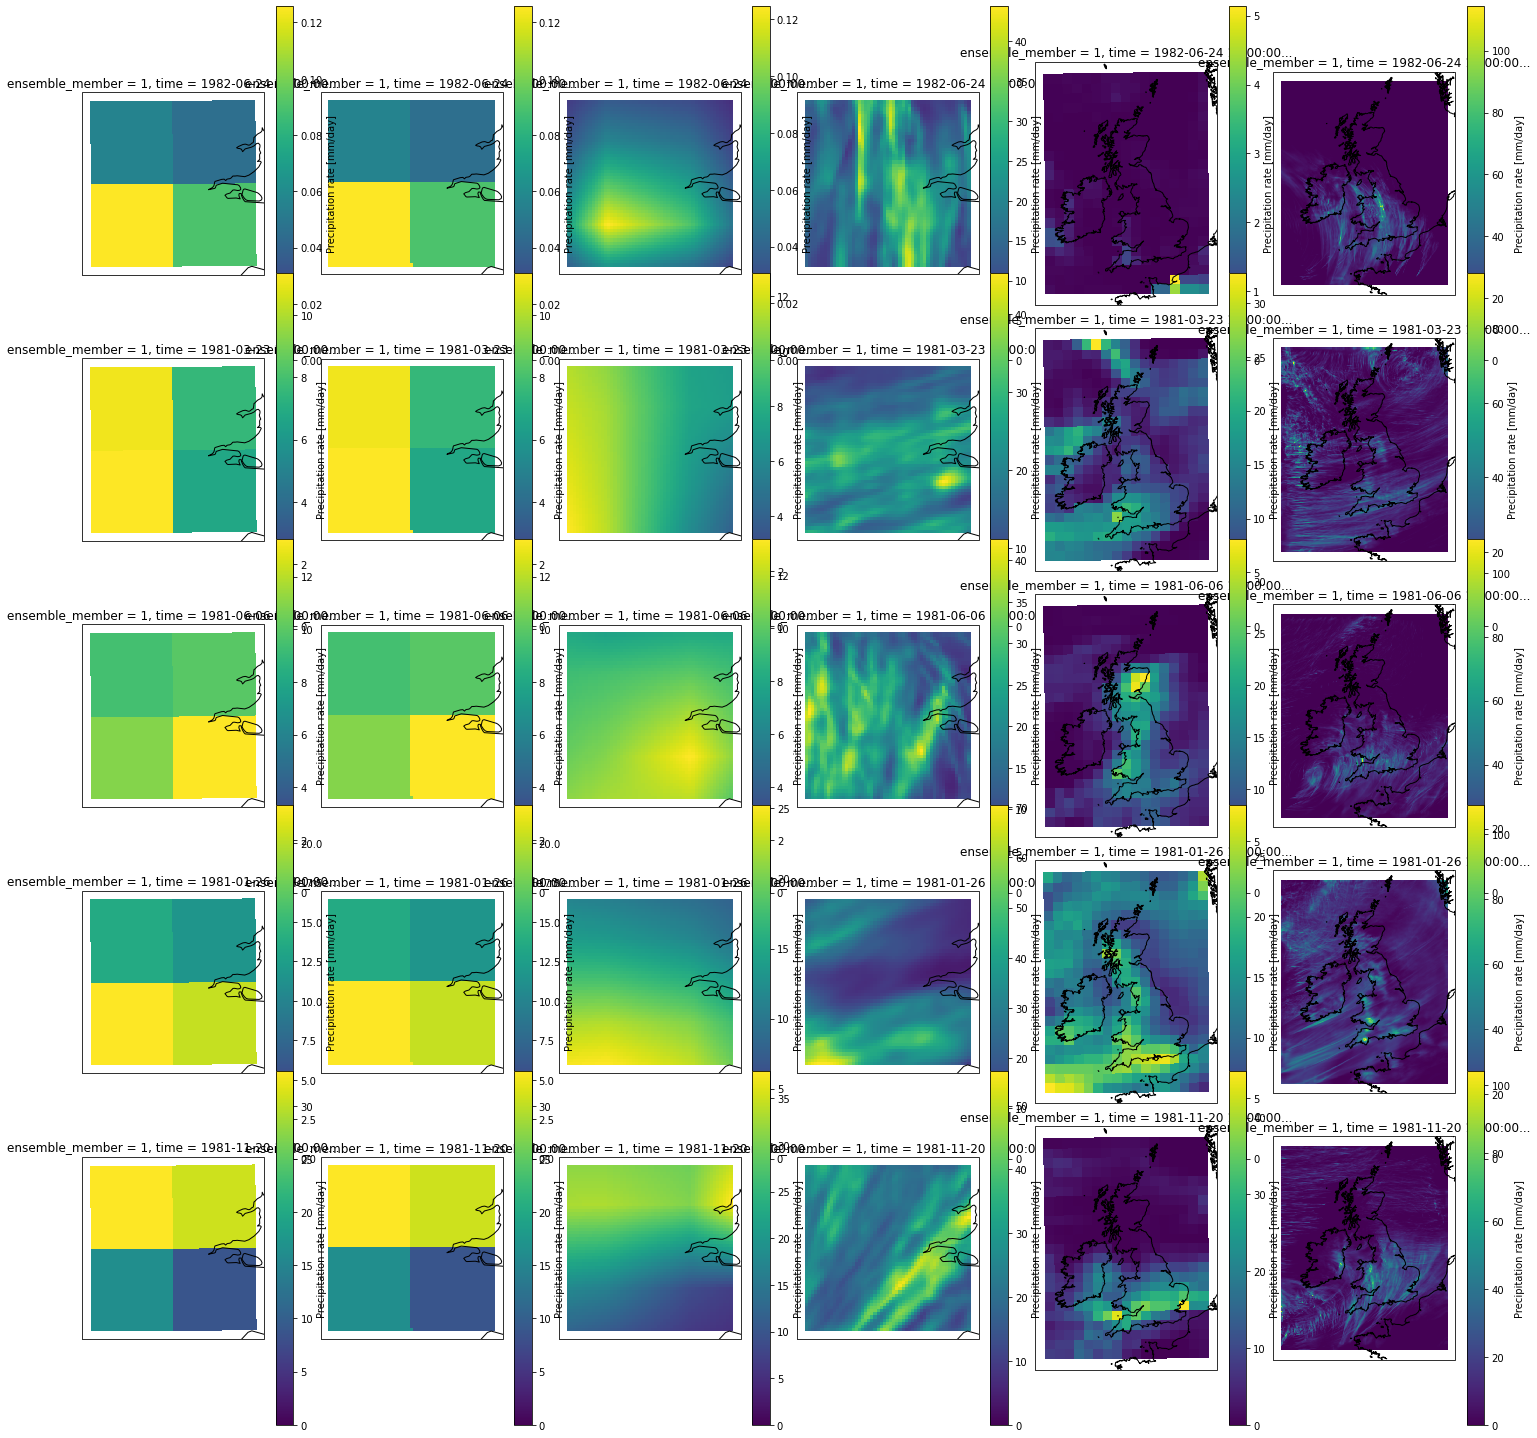

In [11]:
plot_with_ts([london_gcm_data, london_regridded_nn_gcm_data, london_regridded_lin_gcm_data, london_cpm_data, gcm_data, cpm_data], five_wettest_cpm_days)

## Median of wet days according to GCM

Compare plots of precip on 5 days around the median of total rainfall in London boxes (after very dry day are removed, very dry means < 0.4)

Notice how in say 5th row GCM and CPM disagree on which is the wettest quadrant.

In [12]:
london_total_pr = london_gcm_data.sum(dim=["projection_x_coordinate", "projection_y_coordinate"])
london_wet_day_total_pr = london_total_pr.where(london_total_pr.pr > 0.4, drop=True).sortby('pr')
london_median_wet_days = london_wet_day_total_pr.time[329:334]

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 120 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 120 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 120 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 120 times more chunks
  return self.array[key]
/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order in

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


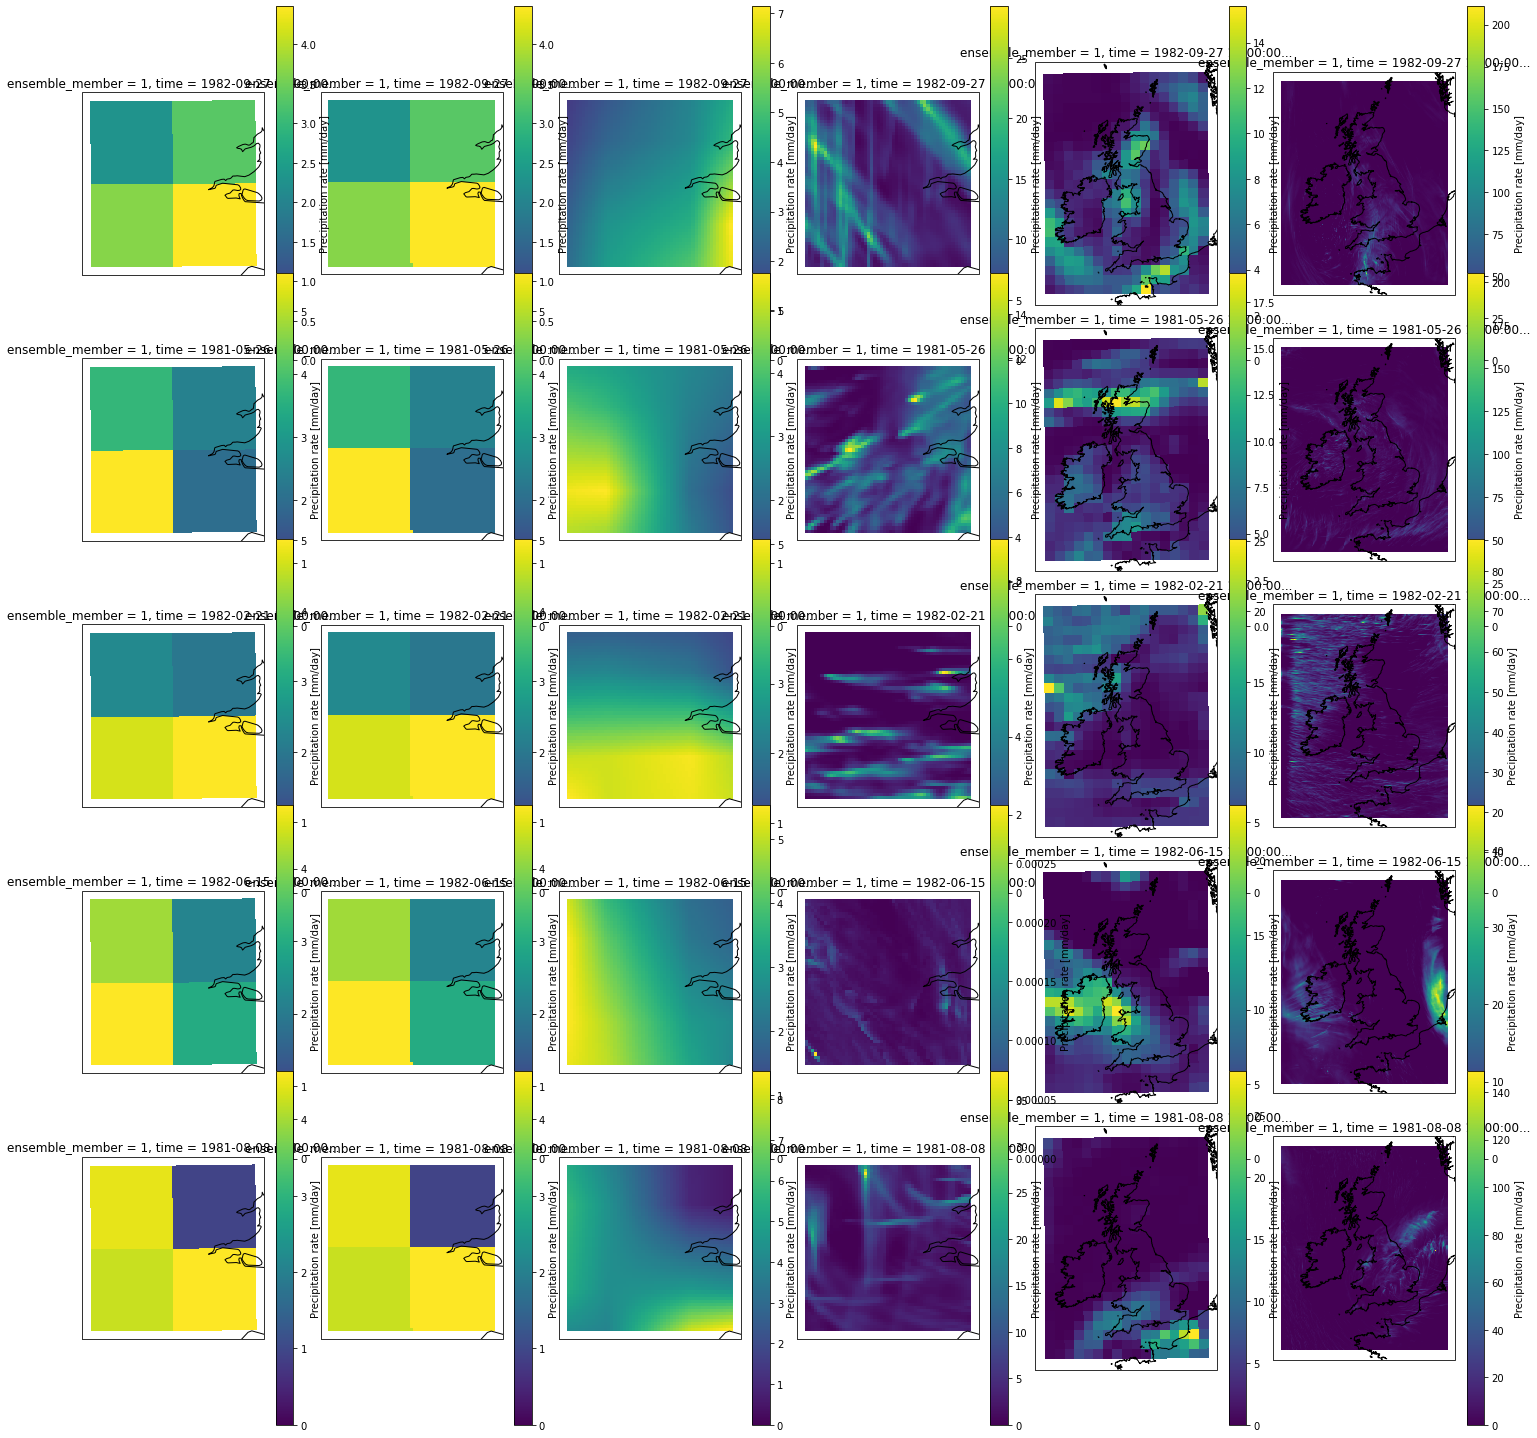

In [13]:
plot_with_ts([london_gcm_data, london_regridded_nn_gcm_data, london_regridded_lin_gcm_data, london_cpm_data, gcm_data, cpm_data], london_median_wet_days)